# Google Data Analytics Capstone: Case Study 1

# Scenario 

You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director
of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore,
your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights,
your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives
must approve your recommendations, so they must be backed up with compelling data insights and professional data
visualizations. 


* I will follow the steps of the data analysis process: ask, prepare, process, analyze, share, and act. 

# Ask
Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. 

Three questions will guide the future marketing program:

1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

# Prepare
I will use Cyclistic’s historical trip data to analyze and identify trends. I downloaded the trip data between Oct 2019 - Jan 2020 Cyclistic trip data.

# Process
I use R language read csv files, i wrangle data and combine into a single file, compare column names each of the files, while the names don't have to be in the same order, then do need to matchperfectly before I can use a command to join them into one file. Rename columns to make them consisent with q1_2019. Inspect the structure of the columns. Remove "bad" data.

# Analyze

* CONDUCT DESCRIPTIVE ANALYSIS
* Descriptive analysis on ride_length (all figures in seconds)
* Compare members and casual users
* See the average ride time by each day for members vs casual users
* Analyze ridership data by type and weekday

# Share

I visualize the number of rides by rider type

I create a visualization for average duration

In [1]:
# Install required packages
#tidyverse for data import and wrangling
#lubridate for data functions
#ggplot for visualization

In [2]:
library(tidyverse) # helps wrangle data
library(lubridate) # helps wrangle data attributes
library(ggplot2) # helps visualize data

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




# Step 1 - Read Data

In [3]:
q2_2019 <- read_csv("Divvy_Trips_2019_Q2.csv")
q3_2019 <- read_csv("Divvy_Trips_2019_Q3.csv")
q4_2019 <- read_csv("Divvy_Trips_2019_Q4.csv")
q1_2020 <- read_csv("Divvy_Trips_2020_Q1.csv")

Rows: 1108163 Columns: 12
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): 03 - Rental Start Station Name, 02 - Rental End Station Name, User...
dbl  (5): 01 - Rental Details Rental ID, 01 - Rental Details Bike ID, 03 - R...
dttm (2): 01 - Rental Details Local Start Time, 01 - Rental Details Local En...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1640718 Columns: 12
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): from_station_name, to_station_name, usertype, gender
dbl  (5): trip_id, bikeid, from_station_id, to_station_id, birthyear
dttm (2): start_time, end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_t

# STEP 2: WRANGLE DATA AND COMBINE INTO A SINGLE FILE

In [4]:
# Compare column names each of the files
colnames(q3_2019)
colnames(q4_2019)
colnames(q2_2019)
colnames(q1_2020)

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "01 - Rental Details Rental ID"                   
 [2] "01 - Rental Details Local Start Time"            
 [3] "01 - Rental Details Local End Time"              
 [4] "01 - Rental Details Bike ID"                     
 [5] "01 - Rental Details Duration In Seconds Uncapped"
 [6] "03 - Rental Start Station ID"                    
 [7] "03 - Rental Start Station Name"                  
 [8] "02 - Rental End Station ID"                      
 [9] "02 - Rental End Station Name"                    
[10] "User Type"                                       
[11] "Member Gender"                                   
[12] "05 - Member Details Member Birthday Year"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [5]:
# Rename columns to make them consistent with q1_2020
(q4_2019 <- rename(q4_2019
                   ,ride_id = trip_id
                   ,rideable_type = bikeid 
                   ,started_at = start_time  
                   ,ended_at = end_time  
                   ,start_station_name = from_station_name 
                   ,start_station_id = from_station_id 
                   ,end_station_name = to_station_name 
                   ,end_station_id = to_station_id 
                   ,member_casual = usertype))

(q3_2019 <- rename(q3_2019
                   ,ride_id = trip_id
                   ,rideable_type = bikeid 
                   ,started_at = start_time  
                   ,ended_at = end_time  
                   ,start_station_name = from_station_name 
                   ,start_station_id = from_station_id 
                   ,end_station_name = to_station_name 
                   ,end_station_id = to_station_id 
                   ,member_casual = usertype))

(q2_2019 <- rename(q2_2019
                   ,ride_id = "01 - Rental Details Rental ID"
                   ,rideable_type = "01 - Rental Details Bike ID" 
                   ,started_at = "01 - Rental Details Local Start Time"  
                   ,ended_at = "01 - Rental Details Local End Time"  
                   ,start_station_name = "03 - Rental Start Station Name" 
                   ,start_station_id = "03 - Rental Start Station ID"
                   ,end_station_name = "02 - Rental End Station Name" 
                   ,end_station_id = "02 - Rental End Station ID"
                   ,member_casual = "User Type"))


ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987
25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998
25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991
25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,2350,313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990
25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,1867,210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987
25223645,2019-10-01 00:04:38,2019-10-01 00:10:51,1891,373,156,Clark St & Wellington Ave,226,Racine Ave & Belmont Ave,Subscriber,Female,1994
25223646,2019-10-01 00:04:52,2019-10-01 00:22:45,1061,1072,84,Milwaukee Ave & Grand Ave,142,McClurg Ct & Erie St,Subscriber,Female,1991
25223647,2019-10-01 00:04:57,2019-10-01 00:29:16,1274,1458,156,Clark St & Wellington Ave,463,Clark St & Berwyn Ave,Subscriber,Male,1995
25223648,2019-10-01 00:05:20,2019-10-01 00:29:18,6011,1437,156,Clark St & Wellington Ave,463,Clark St & Berwyn Ave,Subscriber,Female,1993


ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,1214,117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992
23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,1048,381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NA,NA
23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,1554,313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NA,NA
23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,1503,313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NA,NA
23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,1213,168,Michigan Ave & 14th St,62,McCormick Place,Customer,NA,NA
23479393,2019-07-01 00:02:21,2019-07-01 00:07:31,4941,310,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990
23479394,2019-07-01 00:02:24,2019-07-01 00:23:12,3770,1248,168,Michigan Ave & 14th St,62,McCormick Place,Customer,NA,NA
23479395,2019-07-01 00:02:26,2019-07-01 00:28:16,5442,1550,313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NA,NA
23479396,2019-07-01 00:02:34,2019-07-01 00:28:57,2957,1583,43,Michigan Ave & Washington St,195,Columbus Dr & Randolph St,Customer,NA,NA


ride_id,started_at,ended_at,rideable_type,01 - Rental Details Duration In Seconds Uncapped,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,Member Gender,05 - Member Details Member Birthday Year
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975
22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,1048,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984
22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990
22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993
22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,1007,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992
22178534,2019-04-01 00:19:39,2019-04-01 00:23:56,3123,257,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,Subscriber,Male,1999
22178535,2019-04-01 00:26:33,2019-04-01 00:35:41,6418,548,503,Drake Ave & Fullerton Ave,500,Central Park Ave & Elbridge Ave,Subscriber,Male,1969
22178536,2019-04-01 00:29:48,2019-04-01 00:36:11,4513,383,260,Kedzie Ave & Milwaukee Ave,499,Kosciuszko Park,Subscriber,Male,1991
22178537,2019-04-01 00:32:07,2019-04-01 01:07:44,3280,2137,211,St. Clair St & Erie St,211,St. Clair St & Erie St,Customer,NA,NA


In [6]:
# Inspect the dataframes and look for incongruncies
str(q1_2020)
str(q4_2019)
str(q3_2019)
str(q2_2019)


spec_tbl_df [426,887 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:426887] "EACB19130B0CDA4A" "8FED874C809DC021" "789F3C21E472CA96" "C9A388DAC6ABF313" ...
 $ rideable_type     : chr [1:426887] "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct[1:426887], format: "2020-01-21 20:06:59" "2020-01-30 14:22:39" ...
 $ ended_at          : POSIXct[1:426887], format: "2020-01-21 20:14:30" "2020-01-30 14:26:22" ...
 $ start_station_name: chr [1:426887] "Western Ave & Leland Ave" "Clark St & Montrose Ave" "Broadway & Belmont Ave" "Clark St & Randolph St" ...
 $ start_station_id  : num [1:426887] 239 234 296 51 66 212 96 96 212 38 ...
 $ end_station_name  : chr [1:426887] "Clark St & Leland Ave" "Southport Ave & Irving Park Rd" "Wilton Ave & Belmont Ave" "Fairbanks Ct & Grand Ave" ...
 $ end_station_id    : num [1:426887] 326 318 117 24 212 96 212 212 96 100 ...
 $ start_lat         : num [1:426887] 42 42 41.9 41.9 41.9 ...
 $ s

In [7]:
# Convert ride_id and rideable_type to charater so that they can stack correctly 

q4_2019 <-  mutate(q4_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 
q3_2019 <-  mutate(q3_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 
q2_2019 <-  mutate(q2_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 


In [8]:
# Stack individual quarte's data frames into one big data frame

all_trips <- bind_rows(q2_2019, q3_2019, q4_2019, q1_2020)

In [9]:
# Remove start_lat, start_lng, and  end_lat,end_lng fields as this data was dripped beginning in 2020
all_trips <- all_trips %>%
   select(- c(start_lat,start_lng,end_lat,end_lng,birthyear, gender, 'Member Gender','01 - Rental Details Duration In Seconds Uncapped','05 - Member Details Member Birthday Year'))

# STEP 3 : CLEAN UP AND ADD DATA TO PREPARE FOR ANALYSIS

In [10]:
# Inspect the new table that has been created 

colnames(all_trips) # List of column names

nrow(all_trips) # How many rows are in data frame?

dim(all_trips) # Dimensions of the data frame?

head(all_trips) # See the first 6 rows of data frame. 

str(all_trips) # See list of columns and data types (numeric, character, etc)

summary(all_trips) # Statistical summary of data. Mainly for numerics

[1] "ride_id"            "started_at"         "ended_at"          
 [4] "rideable_type"      "start_station_id"   "start_station_name"
 [7] "end_station_id"     "end_station_name"   "member_casual"     
[10] "tripduration"

[1] 3879822

[1] 3879822      10

ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,tripduration
<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,NA
22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,NA
22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,NA
22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,NA
22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,NA
22178534,2019-04-01 00:19:39,2019-04-01 00:23:56,3123,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,Subscriber,NA


tibble [3,879,822 × 10] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:3879822] "22178529" "22178530" "22178531" "22178532" ...
 $ started_at        : POSIXct[1:3879822], format: "2019-04-01 00:02:22" "2019-04-01 00:03:02" ...
 $ ended_at          : POSIXct[1:3879822], format: "2019-04-01 00:09:48" "2019-04-01 00:20:30" ...
 $ rideable_type     : chr [1:3879822] "6251" "6226" "5649" "4151" ...
 $ start_station_id  : num [1:3879822] 81 317 283 26 202 420 503 260 211 211 ...
 $ start_station_name: chr [1:3879822] "Daley Center Plaza" "Wood St & Taylor St" "LaSalle St & Jackson Blvd" "McClurg Ct & Illinois St" ...
 $ end_station_id    : num [1:3879822] 56 59 174 133 129 426 500 499 211 211 ...
 $ end_station_name  : chr [1:3879822] "Desplaines St & Kinzie St" "Wabash Ave & Roosevelt Rd" "Canal St & Madison St" "Kingsbury St & Kinzie St" ...
 $ member_casual     : chr [1:3879822] "Subscriber" "Subscriber" "Subscriber" "Subscriber" ...
 $ tripduration      : num [1:3879822] NA NA

   ride_id            started_at                    
 Length:3879822     Min.   :2019-04-01 00:02:22.00  
 Class :character   1st Qu.:2019-06-23 07:49:09.25  
 Mode  :character   Median :2019-08-14 17:43:38.00  
                    Mean   :2019-08-26 00:49:59.38  
                    3rd Qu.:2019-10-12 12:10:21.00  
                    Max.   :2020-03-31 23:51:34.00  
                                                    
    ended_at                      rideable_type      start_station_id
 Min.   :2019-04-01 00:09:48.00   Length:3879822     Min.   :  1.0   
 1st Qu.:2019-06-23 08:20:27.75   Class :character   1st Qu.: 77.0   
 Median :2019-08-14 18:02:04.00   Mode  :character   Median :174.0   
 Mean   :2019-08-26 01:14:37.06                      Mean   :202.9   
 3rd Qu.:2019-10-12 12:36:16.75                      3rd Qu.:291.0   
 Max.   :2020-05-19 20:10:34.00                      Max.   :675.0   
                                                                     
 start_station_n

In [11]:
# There are a few problems we will need to fix:

# (1) IN the "member_causual" column, there are two names for members("member" and "Subscriber") and two names for casual riders("Customer" and "casual"). We will need to consolidate that from four to two labels.

# (2) The data can only be aggregated at the ride-level, which is too granular. We will want to add some additional columns of data -- such as day, month, year -- that provide additional opportunities to aggregate the data.

# (3) We will want to add a calculated field for length of ride since the 2020Q1 data did not have the "tripduration" column. We will add "ride_length" to the entire dataframe for consistency.

# (4) There are some rides where tripduration shows up as negative, including several hundred rides where Divvy took bikes out of circulation for Quality Control reasons. We will want to delete these rides.

# In the "member_casual" column, replace "Subscriber" with "member" and "Customer" with "casual"

# Before 2020, Divvy used different labels for these two types of riders ... we will want to make our dataframe consistent with their current nomenclature

# N.B.: "Level" is a special property of a column that is retained even if a subset does not contain any values from a specific level

# Begin by seeing how many observations fall under each usertype

In [21]:
# Reassign to the desired values (we will go with the current 2020 labels)
all_trips <-  all_trips %>% 
  mutate(member_casual = recode(member_casual
                           ,"Subscriber" = "member"
                           ,"Customer" = "casual"))

In [22]:
# Check to make sure the proper number of observations were reassigned
table(all_trips$member_casual)


 casual  member 
 905954 2973868 

In [23]:
# Add columns that list the date, month, day, and year of each ride
all_trips$date <- as.Date(all_trips$started_at) #The default format is yyyy-mm-dd
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

In [25]:
# Add a "ride_length" calculation to all_trips 
all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)

In [26]:
# Inspect the structure of the columns
str(all_trips)

tibble [3,879,822 × 16] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:3879822] "22178529" "22178530" "22178531" "22178532" ...
 $ started_at        : POSIXct[1:3879822], format: "2019-04-01 00:02:22" "2019-04-01 00:03:02" ...
 $ ended_at          : POSIXct[1:3879822], format: "2019-04-01 00:09:48" "2019-04-01 00:20:30" ...
 $ rideable_type     : chr [1:3879822] "6251" "6226" "5649" "4151" ...
 $ start_station_id  : num [1:3879822] 81 317 283 26 202 420 503 260 211 211 ...
 $ start_station_name: chr [1:3879822] "Daley Center Plaza" "Wood St & Taylor St" "LaSalle St & Jackson Blvd" "McClurg Ct & Illinois St" ...
 $ end_station_id    : num [1:3879822] 56 59 174 133 129 426 500 499 211 211 ...
 $ end_station_name  : chr [1:3879822] "Desplaines St & Kinzie St" "Wabash Ave & Roosevelt Rd" "Canal St & Madison St" "Kingsbury St & Kinzie St" ...
 $ member_casual     : chr [1:3879822] "member" "member" "member" "member" ...
 $ tripduration      : num [1:3879822] NA NA NA NA NA NA NA 

In [27]:
# Convert "ride_length" from Factor to numeric so we can run calculations on the data
is.factor(all_trips$ride_length)
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
is.numeric(all_trips$ride_length)

[1] FALSE

[1] TRUE

In [30]:
# Remove "bad" data
all_trips_v2 <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length<0),]

# STEP 4: CONDUCT DESCRIPTIVE ANALYSIS

In [31]:
# Descriptive analysis on ride_length (all figures in seconds)
mean(all_trips_v2$ride_length) #straight average (total ride length / rides)
median(all_trips_v2$ride_length) #midpoint number in the ascending array of ride lengths
max(all_trips_v2$ride_length) #longest ride
min(all_trips_v2$ride_length) #shortest ride

[1] 1479.139

[1] 712

[1] 9387024

[1] 1

In [32]:
# You can condense the four lines above to one line using summary() on the specific attribute
summary(all_trips_v2$ride_length)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     412     712    1479    1289 9387024 

In [33]:
# Compare members and casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,3552.7502
member,850.0662


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,1546
member,589


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,9387024
member,9056634


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,2
member,1


In [34]:
# See the average ride time by each day for members vs casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)


all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<chr>,<dbl>
casual,domingo,3581.4054
member,domingo,919.9746
casual,jueves,3682.9847
member,jueves,823.9278
casual,lunes,3372.2869
member,lunes,842.5726
casual,martes,3596.3599
member,martes,826.1427
casual,miércoles,3718.6619


In [35]:
# Notice that the days of the week are out of order. Let's fix that.
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

In [36]:
# analyze ridership data by type and weekday
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  #creates weekday field using wday()
  group_by(member_casual, weekday) %>%  #groups by usertype and weekday
  summarise(number_of_rides = n()  #calculates the number of rides and average duration 
  ,average_duration = mean(ride_length)) %>%  # calculates the average duration
  arrange(member_casual, weekday)  # sorts

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,do\.,181293,3581.4054
casual,lu\.,103296,3372.2869
casual,ma\.,90510,3596.3599
casual,mi\.,92457,3718.6619
casual,ju\.,102679,3682.9847
casual,vi\.,122404,3773.8351
casual,sá\.,209543,3331.9138
member,do\.,267965,919.9746
member,lu\.,472196,842.5726


`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.


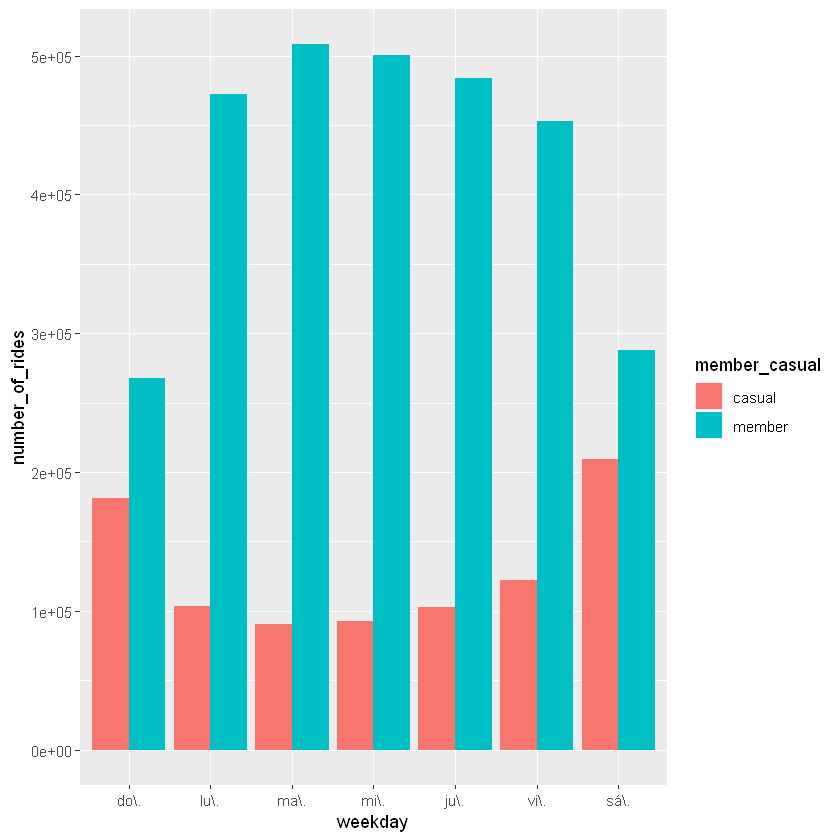

In [37]:
# Let's visualize the number of rides by rider type
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n() ,average_duration = mean(ride_length)) %>%
  
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.


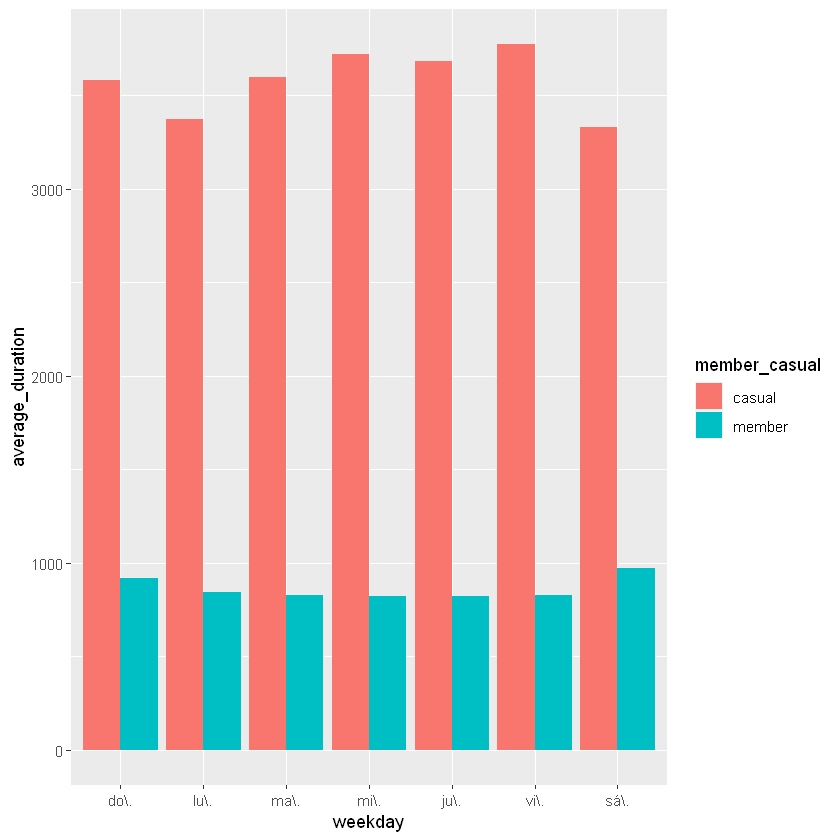

In [38]:
# Let's create a visualization for average duration
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")

# STEP 5: EXPORT SUMMARY FILE FOR FURTHER ANALYSIS

In [ ]:
# Create a csv file that we will visualize in Excel, Tableau, or my presentation software
counts <- aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual +
all_trips_v2$day_of_week, FUN = mean)
write.csv(counts, file = '~/avg_ride_length.csv')